# Aula 10 - requests, json e APIs

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Requests
- 2) JSON
- 3) APIs

___
___
___

## 1) Requests

Computadores em uma rede comunicam-se entre si utilizando **protocolos de comunicação**, que são conjuntos de padronização na forma como a informação é lida e enviada.

O principal protocolo utilizado é o **HTTP (HyperText Transfer Protocol)**, que foi desenvolvido para a internet.

A comunicação HTTP é dada através de ciclos de **requisição (request)** e **resposta (response)**. 

As requisições e respostas são **strings padronizadas** com alguns campos, incluindo, por exemplo, um cabeçalho e o conteúdo do site. Veremos exemplos adiante.

Para fazermos requisições e respostas em Python de forma estruturada (e sem a necessidade de um navegador), existe a biblioteca `Requests`, que nos permite trabalhar com HTTP em um nível mais concreto.

In [1]:
import requests

Utilizamos a função `get()` para fazer uma requisição a determinado endereço da internet.

Isso criará um objeto com a **resposta** da requisição!

In [2]:
resposta = requests.get('https://pt.wikipedia.org/wiki/Wikip%C3%A9dia:P%C3%A1gina_principal')

Este objeto response tem alguns atributos que contêm informações sobre a resposta recebida.

O atributo `.status_code` retorna o **código de status** da resposta à requisição:


- Informativo (1xx): Respostas sem conteúdo, contendo apenas informação sobre a comunicação.
    - Ex: Processing (102) - o servidor ainda está processando a requisição e, por hora, não tem conteúdo a enviar.
<br><br>
- Sucesso (2xx): A mensagem chegou ao servidor e era válida.
    - Ex: OK (200) - tudo ocorreu exatamente como planejado: a requisição estava OK e o servidor respondeu adequadamente.
<br><br>
- Redirecionamento (3xx): O recurso buscado está em outro servidor.
    - Ex: Moved Permanently (301) - o recurso buscado mudou permanentemente de endereço.
<br><br>
- Erro do cliente (4xx): A requisição possui algum erro
    - Ex: Not Found (404) - o recurso buscado não existe.
<br><br>
- Erro do servidor (5xx): O servidor não pode atender à requisição
    - Ex: Service Unavailable (503) - o servidor não é capaz de atender à solicitação no momento (por exemplo, por estar sobrecarregado ou em manutenção).
 <br><br> 

In [3]:
resposta.status_code

200

O atributo `.headers` retorna o **cabeçalho** da resposta à requisição. 

Ele contém algumas informações sobre a sua conexão, o software rodando no servidor, data etc.

In [4]:
resposta.headers

{'Date': 'Sun, 14 Mar 2021 12:42:39 GMT', 'Server': 'mw1354.eqiad.wmnet', 'X-Content-Type-Options': 'nosniff', 'P3p': 'CP="See https://pt.wikipedia.org/wiki/Special:CentralAutoLogin/P3P for more info."', 'Content-Language': 'pt', 'Vary': 'Accept-Encoding,Cookie,Authorization', 'X-Request-Id': 'YE4Ev@QMJeYQuvKCKQw@qgAAAQ8', 'Last-Modified': 'Sun, 14 Mar 2021 12:42:36 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Content-Encoding': 'gzip', 'Age': '32962', 'X-Cache': 'cp1077 miss, cp1077 hit/5759', 'X-Cache-Status': 'hit-front', 'Server-Timing': 'cache;desc="hit-front"', 'Strict-Transport-Security': 'max-age=106384710; includeSubDomains; preload', 'Report-To': '{ "group": "wm_nel", "max_age": 86400, "endpoints": [{ "url": "https://intake-logging.wikimedia.org/v1/events?stream=w3c.reportingapi.network_error&schema_uri=/w3c/reportingapi/network_error/1.0.0" }] }', 'NEL': '{ "report_to": "wm_nel", "max_age": 86400, "failure_fraction": 0.05, "success_fraction": 0.0}', 'Set-Cookie': 'WMF-

Por fim, o último elemento recebido após a requisição é o próprio **conteúdo da página**, que contém o site completo (código em HTML, imagens, vídeos etc).

Para acessar o código HTML do site, tomamos o atributo `.text`

In [5]:
resposta.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Wikipédia, a enciclopédia livre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\\t.","\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"YE4Ev@QMJeYQuvKCKQw@qgAAAQ8","wgCSPNonce":!1,"wgCanonicalNamespace":"Project","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":4,"wgPageName":"Wikipédia:Página_principal","wgTitle":"Página principal","wgCurRevisionId":60207126,"wgRevisionId":60207126,"wgArticleId":952,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":[],"wgPageContentLanguage":"pt","wgPageContentModel":"wikitext","wgRelevantPageName":"Wikipédia:Página_principal","wgRelevantArticleId"

O HTML vem na forma de uma string, que é praticamente ilegível! 

Mas o seu computador entende ele, e é assim que os sites são exibidos, quando acessados!

___
___
___


## 2) JSON

JSON é uma sigla para JavaScript Object Notation. 

O JavaScript é ma linguagem POO muito utilizada em web.

O JSON será a forma que receberemos as respostas de requisições a **APIs**, que veremos a seguir.

Os objetos nessa linguagem são representados de forma bem parecida com dicionários, mas **como uma string**, por exemplo:

```
'{"nome":"Mario","pontuacao":0}'
```

Para processar JSON, usamos a biblioteca `json`

A função `.loads()` transforma o json string em um dicionário do Python

In [6]:
import json

jogador = '{"nome":"Mario","pontuacao":0}'

dicionario = json.loads(jogador)

dicionario

{'nome': 'Mario', 'pontuacao': 0}

A função `.dump()` recebe um dicionário e retorna uma string pronta para ser salva ou enviada como JSON:

In [7]:
jogador = {}

jogador['nome']  = 'Mario'
jogador['pontuacao'] = 0

string_json = json.dumps(jogador)

string_json

'{"nome": "Mario", "pontuacao": 0}'

Agora, podemos usar o JSON e o Requests de forma combinada para estruturar as requisições!

É normal recebermos respostas em JSON na internet quando estamos trabalhando com APIs.

Se o atributo `text` da resposta for um JSON, usamos a biblioteca pra transformá-lo em um dicionário do Python!

Vejamos o exemplo abaixo:

In [8]:
resposta = requests.get('https://pokeapi.co/api/v2/pokemon/pikachu')

resposta.headers

{'Date': 'Sun, 14 Mar 2021 21:52:03 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '5524', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=d64f13d2f33072dfe49bd8878f4a1e6f21615758723; expires=Tue, 13-Apr-21 21:52:03 GMT; path=/; domain=.pokeapi.co; HttpOnly; SameSite=Lax; Secure', 'Access-Control-Allow-Origin': '*', 'Cache-Control': 'public, max-age=86400, s-maxage=86400', 'Content-Encoding': 'gzip', 'Etag': 'W/"2e942-YMbOkANZtkhzh7OvwZ20EKKN+fs"', 'Function-Execution-Id': '1sdhxh6yb89c', 'X-Cloud-Trace-Context': '923390964dfa338ccb8f41904b332cbc;o=1', 'X-Country-Code': 'US', 'X-Orig-Accept-Language': 'en-US,en;q=0.9', 'X-Powered-By': 'Express', 'X-Served-By': 'cache-ewr18132-EWR', 'X-Cache': 'HIT', 'X-Cache-Hits': '1', 'X-Timer': 'S1615301015.201694,VS0,VE1', 'Vary': 'Accept-Encoding,cookie,need-authorization, x-fh-requested-host, accept-encoding', 'CF-Cache-Status': 'HIT', 'Age': '16884', 'Accept-Ranges': 'bytes', 'cf-request-id': '08d452a1900000d02080

O "Content-Type" é um JSON! Portanto, o atributo `.text` será um JSON!

In [9]:
resposta.text

'{"abilities":[{"ability":{"name":"static","url":"https://pokeapi.co/api/v2/ability/9/"},"is_hidden":false,"slot":1},{"ability":{"name":"lightning-rod","url":"https://pokeapi.co/api/v2/ability/31/"},"is_hidden":true,"slot":3}],"base_experience":112,"forms":[{"name":"pikachu","url":"https://pokeapi.co/api/v2/pokemon-form/25/"}],"game_indices":[{"game_index":84,"version":{"name":"red","url":"https://pokeapi.co/api/v2/version/1/"}},{"game_index":84,"version":{"name":"blue","url":"https://pokeapi.co/api/v2/version/2/"}},{"game_index":84,"version":{"name":"yellow","url":"https://pokeapi.co/api/v2/version/3/"}},{"game_index":25,"version":{"name":"gold","url":"https://pokeapi.co/api/v2/version/4/"}},{"game_index":25,"version":{"name":"silver","url":"https://pokeapi.co/api/v2/version/5/"}},{"game_index":25,"version":{"name":"crystal","url":"https://pokeapi.co/api/v2/version/6/"}},{"game_index":25,"version":{"name":"ruby","url":"https://pokeapi.co/api/v2/version/7/"}},{"game_index":25,"version"

Vamos agora transformar o JSON em um dicionário

In [10]:
json.loads(resposta.text)

{'abilities': [{'ability': {'name': 'static',
    'url': 'https://pokeapi.co/api/v2/ability/9/'},
   'is_hidden': False,
   'slot': 1},
  {'ability': {'name': 'lightning-rod',
    'url': 'https://pokeapi.co/api/v2/ability/31/'},
   'is_hidden': True,
   'slot': 3}],
 'base_experience': 112,
 'forms': [{'name': 'pikachu',
   'url': 'https://pokeapi.co/api/v2/pokemon-form/25/'}],
 'game_indices': [{'game_index': 84,
   'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}},
  {'game_index': 84,
   'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}},
  {'game_index': 84,
   'version': {'name': 'yellow',
    'url': 'https://pokeapi.co/api/v2/version/3/'}},
  {'game_index': 25,
   'version': {'name': 'gold', 'url': 'https://pokeapi.co/api/v2/version/4/'}},
  {'game_index': 25,
   'version': {'name': 'silver',
    'url': 'https://pokeapi.co/api/v2/version/5/'}},
  {'game_index': 25,
   'version': {'name': 'crystal',
    'url': 'https://pokeapi.co/a

Mas podemos usar o método `.json()` diretamente no objeto da resposta, isso já nos retorna um dicionário em Python, automaticamente:

In [11]:
resposta.json()

{'abilities': [{'ability': {'name': 'static',
    'url': 'https://pokeapi.co/api/v2/ability/9/'},
   'is_hidden': False,
   'slot': 1},
  {'ability': {'name': 'lightning-rod',
    'url': 'https://pokeapi.co/api/v2/ability/31/'},
   'is_hidden': True,
   'slot': 3}],
 'base_experience': 112,
 'forms': [{'name': 'pikachu',
   'url': 'https://pokeapi.co/api/v2/pokemon-form/25/'}],
 'game_indices': [{'game_index': 84,
   'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}},
  {'game_index': 84,
   'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}},
  {'game_index': 84,
   'version': {'name': 'yellow',
    'url': 'https://pokeapi.co/api/v2/version/3/'}},
  {'game_index': 25,
   'version': {'name': 'gold', 'url': 'https://pokeapi.co/api/v2/version/4/'}},
  {'game_index': 25,
   'version': {'name': 'silver',
    'url': 'https://pokeapi.co/api/v2/version/5/'}},
  {'game_index': 25,
   'version': {'name': 'crystal',
    'url': 'https://pokeapi.co/a

Dica: tentar sempre usar o método json acima: se der certo, ótimo, quer dizer que a requisição feita retornou um json. Se não der certo, o máximo que vai acontecer vai ser um erro.

___
___
___


## 3) APIs

**API (Application Programming Interface)** é uma estratura estabelecida por alguns provedores de dados, que estabelece protocolos comuns para requisições e respostas.

As APIs são usadas para a construção de aplicações entre diferentes plataformas.

Como as aplicações podem rodar em diferentes plataformas (Windows, Android, MacOS, iOS, um navegador de internet...), é importante estabelecer uma linguagem comum para que todos consigam consumir esses dados.

As APIs garantem esta comunicação comum.

As APIs são acessadas através de um url, de modo que elas podem ser utilizadas diretamente pela biblioteca `requests`

### URI Base

Várias APIs fornecem um "endereço base". Todas as suas requisições incluirão esse endereço, e ao final dele nós colocamos detalhes específicos para cada um dos recursos disponíveis.

Por exemplo, na AlphaVantage (https://www.alphavantage.co/), uma API de dados de bolsas de valores e criptomoedas, a URI base é:

https://www.alphavantage.co/query?

Após a interrogação nós colocaremos os campos para nossa consulta. Por exemplo, para fazer uma consulta sem autenticação para valores da IBM, de 5 em 5 minutos, o endereço completo fica:

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo

Note o formato com &NomeDoCampo=ValorDoCampo. Ele é bastante comum. 

In [12]:
resposta = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo")

resposta.json()

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume',
  '2. Symbol': 'IBM',
  '3. Last Refreshed': '2021-03-12 18:15:00',
  '4. Interval': '5min',
  '5. Output Size': 'Compact',
  '6. Time Zone': 'US/Eastern'},
 'Time Series (5min)': {'2021-03-12 18:15:00': {'1. open': '127.6200',
   '2. high': '127.6200',
   '3. low': '127.6200',
   '4. close': '127.6200',
   '5. volume': '182'},
  '2021-03-12 16:40:00': {'1. open': '127.7500',
   '2. high': '127.7500',
   '3. low': '127.7500',
   '4. close': '127.7500',
   '5. volume': '906'},
  '2021-03-12 16:35:00': {'1. open': '127.7500',
   '2. high': '127.7500',
   '3. low': '127.7500',
   '4. close': '127.7500',
   '5. volume': '101'},
  '2021-03-12 16:30:00': {'1. open': '127.6200',
   '2. high': '127.6200',
   '3. low': '127.6200',
   '4. close': '127.6200',
   '5. volume': '152'},
  '2021-03-12 16:15:00': {'1. open': '127.6100',
   '2. high': '127.6100',
   '3. low': '127.6100',
   '4. close': '127.6100

In [13]:
dic = resposta.json()

In [14]:
# pegando apenas os dados da série temporal (chave "Time Series (5min)" do dicionario
# criado a partir do json)

dic2 = dic['Time Series (5min)']

In [15]:
# criando um dataframe com os dados da série temporal

import pandas as pd

df = pd.DataFrame(dic2).transpose()

df

,1. open,2. high,3. low,4. close,5. volume
2021-03-12 18:15:00,127.6200,127.6200,127.6200,127.6200,182
2021-03-12 16:40:00,127.7500,127.7500,127.7500,127.7500,906
2021-03-12 16:35:00,127.7500,127.7500,127.7500,127.7500,101
2021-03-12 16:30:00,127.6200,127.6200,127.6200,127.6200,152
2021-03-12 16:15:00,127.6100,127.6100,127.6100,127.6100,109
...,...,...,...,...,...
2021-03-12 06:30:00,127.0900,127.0900,127.0900,127.0900,253
2021-03-12 05:10:00,126.0100,126.0100,126.0100,126.0100,289
2021-03-12 04:35:00,126.5000,126.5000,126.5000,126.5000,569
2021-03-12 04:20:00,126.3000,126.3000,126.3000,126.3000,616


In [16]:
# transformando os dados da coluna "1. open" em floats (eles vêm como strings)
df['1. open'] = df['1. open'].apply(lambda x: float(x))

<AxesSubplot:>

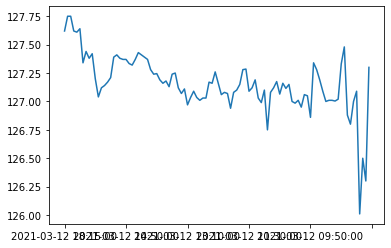

In [17]:
# fazendo um plot super simples
df['1. open'].plot()

__Como saber detalhes do uso da API?__

Não tem outro jeito: tem que ir na documentação.

Veremos isso adiante.

Antes, vamos falar sobre alguns elementos conceituais comuns a todas as APIs:

**Schema**

É bastante comum que as APIs disponibilizem um "modelo" genérico de como será formatado o seu JSON, XML etc para que os desenvolvedores saibam quais campos esperar e quais tipos de dados serão possíveis para cada campo. 

Este modelo é chamado de **schema**, e está presente na documentação das APIs.

**Autenticação**

Enquanto algumas APIs são grátis, outras são pagas. 

Também há APIs que você pode consumir um certo volume de dados, e acima disso você deverá pagar. 

Assim, é muito comum a necessidade da **autenticação** da API para que seu uso seja possível.

Os dois modelos mais comuns de autenticação são:

- Chave: ao fazer seu registro, você recebe uma **chave que será inclusa na requisição**.

- OAuth: um esquema um pouco mais complexo onde são combinados códigos de autorização, identificação do cliente, etc. APIs de gigantes da internet (como Google e Facebook) costumam usar esse modelo.

**Rate limiting**

As APIs costumam limitar o número de requisições que você pode fazer em um instante de tempo (3 requisições por minuto, 10000 requisições por dia etc). 

Isso ocorre por dois motivos:

- Segurança: evitar uma sobrecarga no servidor deles que possa indisponibilizar a API para todos os usuários;

- Venda de planos: várias APIs pagas possuem diferentes planos de pagamento. Os planos mais caros costumam permitir mais requisições do que os mais baratos ou gratuitos.


__Que APIs posso usar?__

Como saber se existe uma boa API para ajudar? Confira alguns bons repositórios de API organizados por categoria:

- https://github.com/n0shake/public-apis

- https://github.com/public-apis/public-apis

- https://any-api.com/

    Sites de governos costumam ter uma grande riqueza de dados também. Segue abaixo algumas sugestões (oficiais ou mantidas por voluntários) com dados do Brasil como um todo. Experimente buscar por bases de dados de sua cidade ou estado!

- http://www.transparencia.gov.br/swagger-ui.html

- http://www.dados.gov.br/

- https://brasil.io/home/


__Vamos agora a alguns exemplos!__

In [18]:
import requests

resposta = requests.get("https://open.exchangerate-api.com/v6/latest")

dic = resposta.json()

dic

{'result': 'success',
 'provider': 'https://www.exchangerate-api.com',
 'documentation': 'https://www.exchangerate-api.com/docs/free',
 'terms_of_use': 'https://www.exchangerate-api.com/terms',
 'time_last_update_unix': 1615680151,
 'time_last_update_utc': 'Sun, 14 Mar 2021 00:02:31 +0000',
 'time_next_update_unix': 1615768461,
 'time_next_update_utc': 'Mon, 15 Mar 2021 00:34:21 +0000',
 'time_eol_unix': 0,
 'base_code': 'USD',
 'rates': {'USD': 1,
  'AED': 3.67,
  'AFN': 77.83,
  'ALL': 103.58,
  'AMD': 525.94,
  'ANG': 1.79,
  'AOA': 616.69,
  'ARS': 90.67,
  'AUD': 1.29,
  'AWG': 1.79,
  'AZN': 1.7,
  'BAM': 1.64,
  'BBD': 2,
  'BDT': 84.62,
  'BGN': 1.64,
  'BHD': 0.376,
  'BIF': 1942.64,
  'BMD': 1,
  'BND': 1.34,
  'BOB': 6.88,
  'BRL': 5.56,
  'BSD': 1,
  'BTN': 72.7,
  'BWP': 11.05,
  'BYN': 2.59,
  'BZD': 2,
  'CAD': 1.25,
  'CDF': 1974.96,
  'CHF': 0.929,
  'CLP': 718.85,
  'CNY': 6.5,
  'COP': 3572.44,
  'CRC': 610.24,
  'CUC': 1,
  'CUP': 25.75,
  'CVE': 92.21,
  'CZK': 21.

In [19]:
# pegando a cotação do real
dic["rates"]["BRL"]

5.56

__Um outro exemplo...__

API de informação de filmes (esse precisa de uma chave de autenticação!

In [20]:
lista = ["The Matrix", "Titanic"]

lista_respostas = []

for item in lista:

    # substitua o [sua_chave] pela chave que vc recebeu após o cadastro!
    dic = requests.get("http://www.omdbapi.com/?apikey=[sua_chave]&t=" + item).json()
    
    lista_respostas.append(dic)

In [21]:
# está inválido abaixo, pq precisa da chave pra requisição acima funcionar!

lista_respostas

[{'Response': 'False', 'Error': 'Invalid API key!'},
 {'Response': 'False', 'Error': 'Invalid API key!'}]